In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node__interactivity = "all"
%matplotlib inline  

##**Autocorrelación espacial de cultivos de marihuana en Jalisco** 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pysal

In [ ]:
!pip install contextily

In [ ]:
!pip install geopandas 

In [ ]:
import seaborn as sns

In [ ]:
import geopandas as gpd

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
import contextily as ctx
from pysal.lib import weights
from pysal.lib import cg as geometry
from pysal.explore import esda
from pysal.viz import splot

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
import numpy as np


In [ ]:
from pysal.lib import weights
from pysal.lib import cg as geometry
from pysal.explore import esda
from pysal.viz import splot
np.random.seed(123)

In [ ]:
%cd'/content/drive/My Drive/geoinformatica_paulina'
!ls

/content/drive/My Drive/geoinformatica_paulina
 2015ci_clean.cpg			  incendios.csv
 2015ci_clean.dbf			  indicadores
 2015ci_clean.prj			  london_boroughs.geojson
 2015ci_clean.shp			  mapa_leaf_terinada.zip
 2015ci_clean.shx			  may_2011.csv
 abri_2020_csv.csv			  neighbour.geojson
 abril_2000.csv				  olympics.csv
 brexit.gpkg				  RejectStats_2018Q4.csv
 Clustering.ipynb			  tarea_4.ipynb
'Copia de tarea5_regionalizacion.ipynb'   tarea5_regionalizacion.ipynb
 country_vaccinations.csv		  tarea_pandas.ipynb
 cuaderno_proyect_geoinfo.ipynb		  Untitled0.ipynb
 diabetes.csv				  Untitled1.ipynb
 ESDA.ipynb				  Untitled2.ipynb
 france.geojson				  Untitled3.ipynb
 graficas_pol_pub.ipynb			  vegetacion.cpg
 Graf_vegetac2020.jpg			  vegetacion.dbf
 Graf_vegetac.jpg			  vegetacion.prj
 Graf_veget.jpg				  vegetacion.shp
 ilm_abb.geojson			  vegetacion.shx
 incendios2.csv				  vgsales.csv


In [ ]:
bd_pob = gpd.read_file('/content/drive/My Drive/geoinformatica_paulina/2015ci_clean.shp') 

In [ ]:
bd_pob.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NoPM2015,NoPA2015,HcPM2015,HcPA2015,geometry
0,14001,14,001,Acatic,0,0,0.00,0.0,"POLYGON ((2410828.699 985273.726, 2410924.473 ..."
1,14004,14,004,Amacueca,5,0,0.54,0.0,"POLYGON ((2331694.826 897026.370, 2331868.724 ..."
2,14005,14,005,Amatitán,43,0,4.62,0.0,"POLYGON ((2318919.000 991037.000, 2319056.299 ..."
3,14006,14,006,Ameca,6,0,0.83,0.0,"POLYGON ((2268327.674 967041.099, 2268346.587 ..."
4,14007,14,007,San Juanito de Escobedo,32,0,6.77,0.0,"POLYGON ((2287824.290 990709.705, 2288017.613 ..."


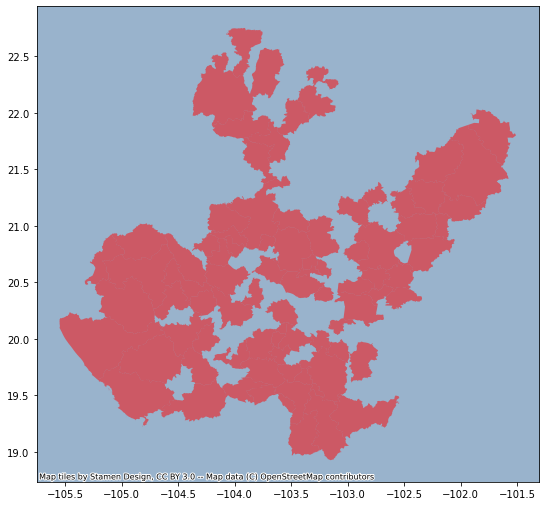

In [ ]:
# Transforma a Web Mercator CRS y grafica 
ax = bd_pob.to_crs(epsg=4326).plot(figsize=(9, 9), alpha=0.5, color='red');
# Agrega mapa base
ctx.add_basemap(ax)

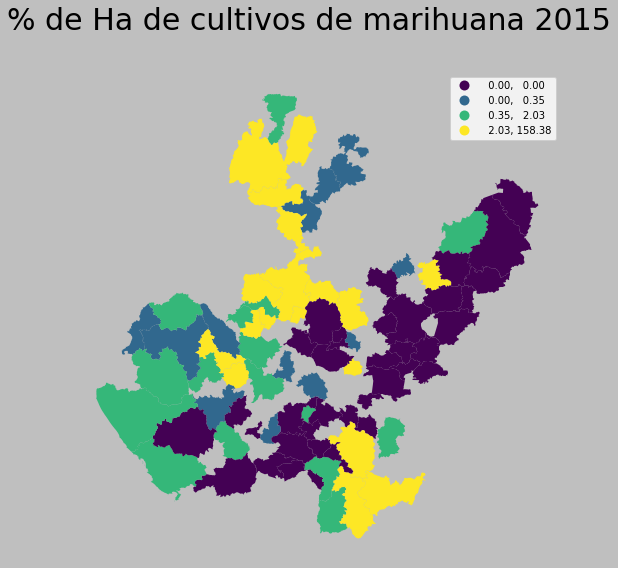

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Grafica % en favor 
bd_pob.plot(column='HcPM2015', scheme='Quantiles', 
        legend=True, ax=ax)
# Remueve el marco de los ejes
ax.set_axis_off()
# Cambia el color de fondo
f.set_facecolor('0.75')
# Titulo
f.suptitle('% de Ha de cultivos de marihuana 2015', size=30)
# Despliegue de la gráfica
plt.show()

In [ ]:
# Generate W from the GeoDataFrame
w = weights.KNN.from_dataframe(bd_pob, k=8)
# Row-standardization
w.transform = 'R'

In [ ]:
bd_pob['w_ANALF'] = weights.spatial_lag.lag_spatial(w, bd_pob['HcPM2015'])

In [ ]:
bd_pob[['NOMGEO', 'HcPM2015', 'w_ANALF']].head()

,NOMGEO,HcPM2015,w_ANALF
0,Acatic,0.00,2.235875
1,Amacueca,0.54,0.021250
2,Amatitán,4.62,26.452437
3,Ameca,0.83,3.185250
4,San Juanito de Escobedo,6.77,25.088438


In [ ]:
bd_pob['ANALF_std'] = (bd_pob['HcPM2015'] - bd_pob['HcPM2015'].mean()) / bd_pob['HcPM2015'].std()

In [ ]:
bd_pob['w_ANALF_std'] = weights.spatial_lag.lag_spatial(w, bd_pob['ANALF_std'])

##Autorrelación Global

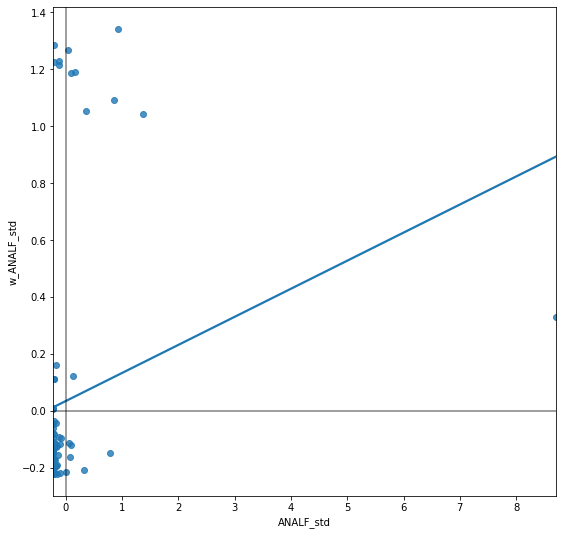

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Graficamos 
sns.regplot(x='ANALF_std', y='w_ANALF_std', data=bd_pob, ci=None)
# Agergamos líneas horizontal y vertical
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Despliegue
plt.show()

In [ ]:
moran = esda.moran.Moran(bd_pob['HcPM2015'], w)

In [ ]:
moran.I

0.09867282512979113

In [ ]:
moran.p_sim

0.001

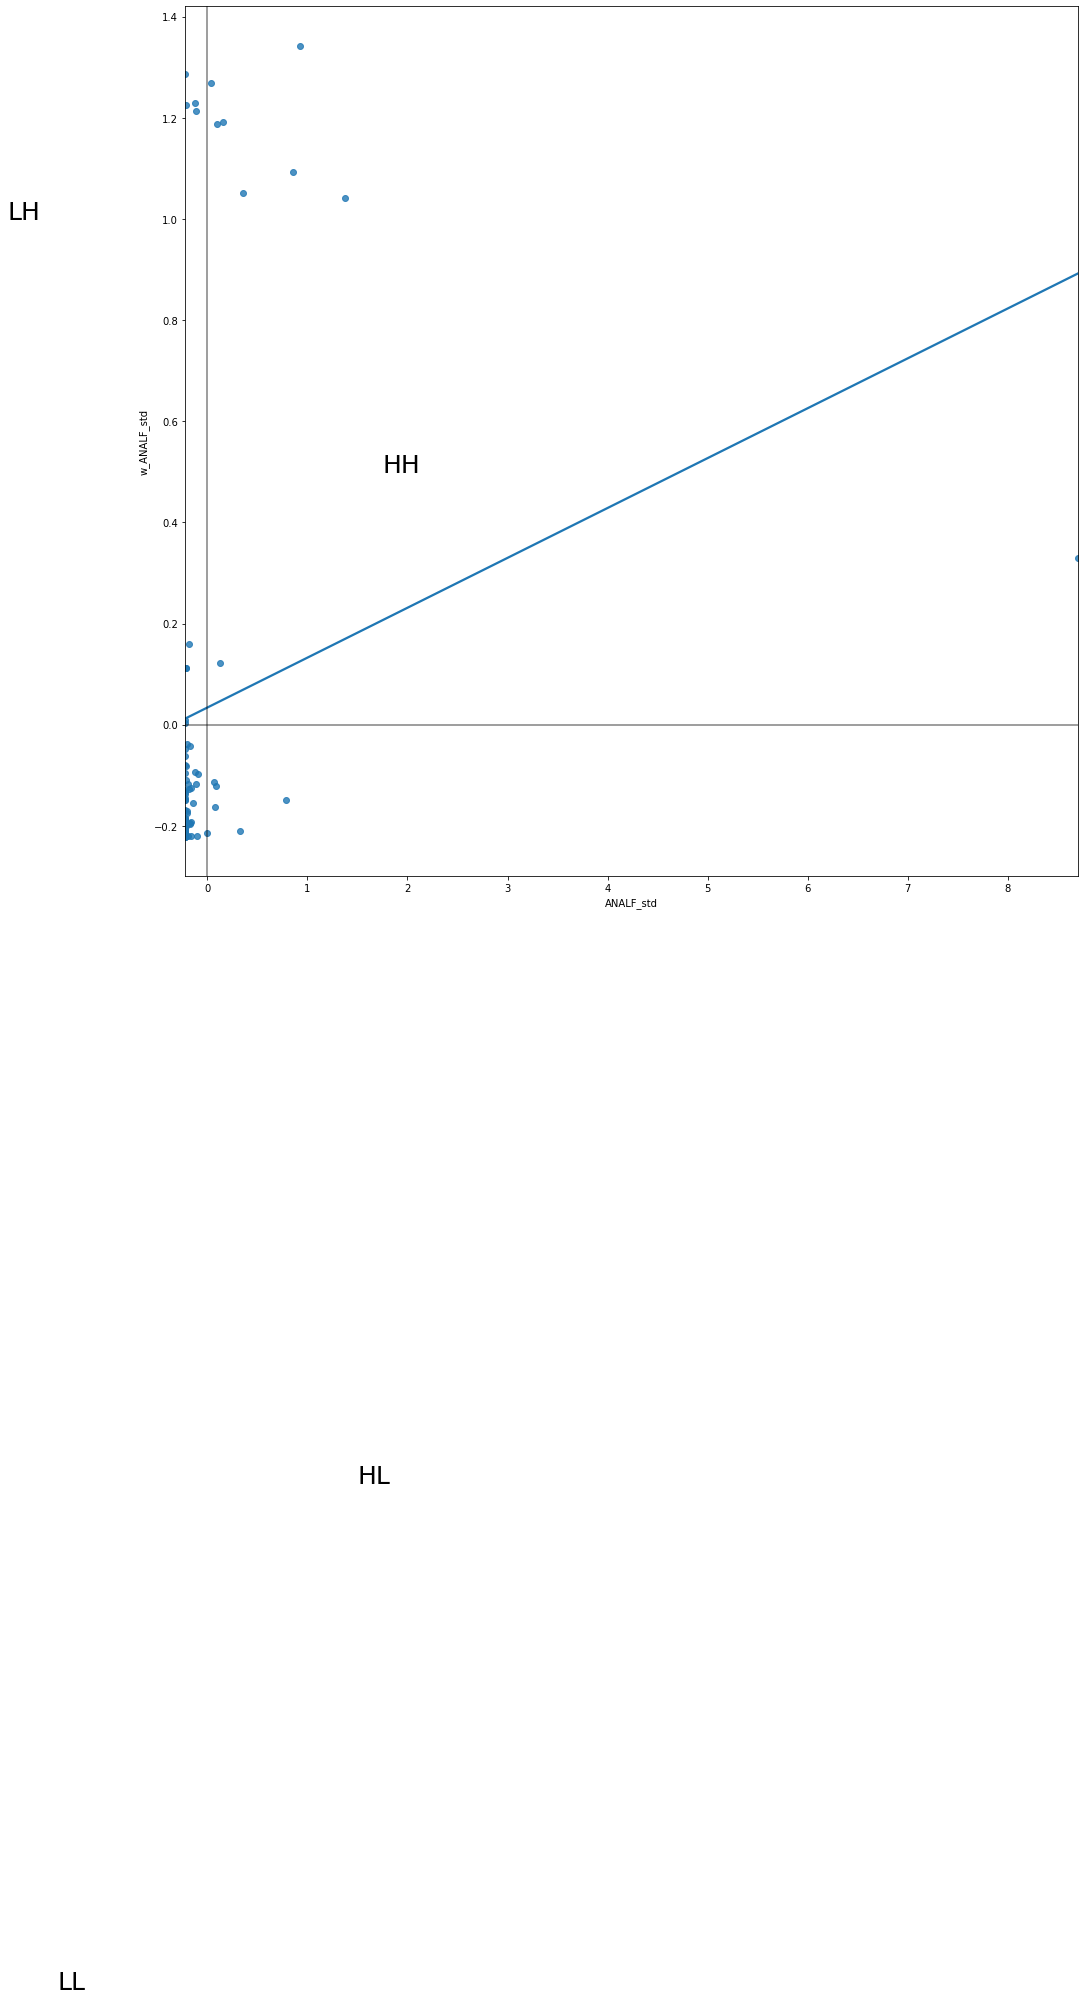

In [ ]:
# Ajustamos la figura y los ejes
f, ax = plt.subplots(1, figsize=(16, 16))
# Graficamos los valores
sns.regplot(x='ANALF_std', y='w_ANALF_std', data=bd_pob, ci=None)
# Agregamos líneas verticales, horizontales y etiquetas
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
plt.text(1.75, 0.5, "HH", fontsize=25)
plt.text(1.5, -1.5, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1.5, -2.5, "LL", fontsize=25)
# Desplegamos la gráfica
plt.show()

In [ ]:
lisa = esda.moran.Moran_Local(bd_pob['HcPM2015'], w)

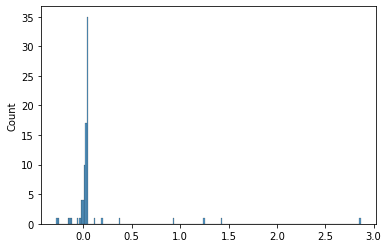

In [ ]:
sns.histplot(lisa.Is)

In [ ]:
bd_pob['significant'] = lisa.p_sim < 0.05
# Almacenamos el cuadrante al que pertenecen las observaciones
bd_pob['quadrant'] = lisa.q

In [ ]:
lisa.p_sim[:5]

array([0.449, 0.01 , 0.002, 0.298, 0.004])

In [ ]:
bd_pob['quadrant'].head()

0    3
1    3
2    1
3    3
4    1
Name: quadrant, dtype: int64

###Mapa de clusters

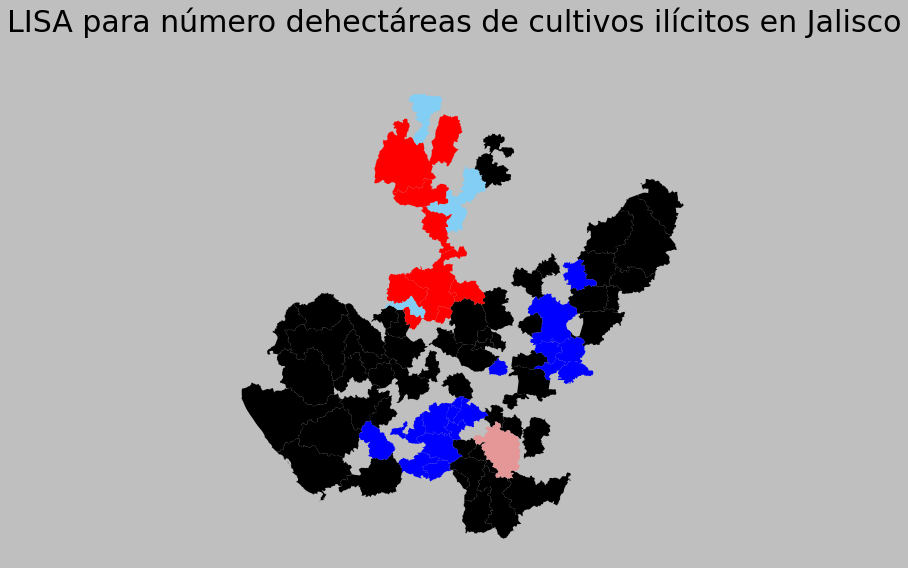

In [ ]:
# Ajusta la figura y los ejes
f, ax = plt.subplots(1, figsize=(9, 9))
# Grafica observaciones no significativas
ns = bd_pob.loc[bd_pob['significant']==False, 'geometry']
ns.plot(ax=ax, color='k')
# Grafica clusters Alto-Alto
hh = bd_pob.loc[(bd_pob['quadrant']==1) & (bd_pob['significant']==True), 'geometry']
hh.plot(ax=ax, color='red')
# Grafica clusters Bajo-Bajo
ll = bd_pob.loc[(bd_pob['quadrant']==3) & (bd_pob['significant']==True), 'geometry']
ll.plot(ax=ax, color='blue')
# Grafica anomalías espacials Bajo-ALto
lh = bd_pob.loc[(bd_pob['quadrant']==2) & (bd_pob['significant']==True), 'geometry']
lh.plot(ax=ax, color='#83cef4')
# Grafica anomalías espaciales Alto-Bajo
hl = bd_pob.loc[(bd_pob['quadrant']==4) & (bd_pob['significant']==True), 'geometry']
hl.plot(ax=ax, color='#e59696')
# Estilo y despliegue
f.suptitle('LISA para número dehectáreas de cultivos ilícitos en Jalisco', size=30)
f.set_facecolor('0.75')
ax.set_axis_off()
plt.show()